# DKRZ Tutorial: &nbsp; &nbsp; Shapefiles

----

```text
Copyright 2024 Deutsches Klimarechenzentrum GmbH (DKRZ)
Licensed under CC-BY-NC-SA-4.0
```

----

The following example gives a brief overview of how to easily read in a **shapefile** using the **GeoPandas** software package and use it for visualization.

The used shapefile from data.dtu.dk contains the border lines of the European countries.

Learning steps:

- read the data into a GeoPandas DataFrame
- have a closer look at the content
  - country (DataFrame row), abbreviation and name (DataFrame columns)
  - country area (DataFrame geometry, polygons)
  - country borderline (DataFrame geometry, polylines)
- extract the data for a single country
- extract the data for multiple countries
- plot geometries
- combine GeoPandas plotting routine with Matplotlib and Cartopy
  - draw country borderline on data (overlay)

**GeoPandas**

URL: https://geopandas.org/en/stable/

**Shapefile description**

From the _ESRI Shapefile Technical Description_ <br>
https://www.esri.com/content/dam/esrisites/sitecore-archive/Files/Pdfs/library/whitepapers/pdfs/shapefile.pdf

> A shapefile stores nontopological geometry and attribute information for the spatial
features in a data set. The geometry for a feature is stored as a shape comprising a set of
vector coordinates.
> 
> Because shapefiles do not have the processing overhead of a topological data structure,
they have advantages over other data sources such as faster drawing speed and edit
ability. Shapefiles handle single features that overlap or that are noncontiguous. They
also typically require less disk space and are easier to read and write.
> 
> Shapefiles can support point, line, and area features. Area features are represented as
closed loop, double-digitized polygons. Attributes are held in a dBASE® format file.
Each attribute record has a one-to-one relationship with the associated shape record.

**Download shapefile**

Shapefile download page: <br>
https://data.dtu.dk/articles/dataset/Shapefile_of_European_countries/23686383

Used shapefile data set: <br>
https://data.dtu.dk/ndownloader/articles/23686383/versions/1

<cite>Sevdari, Kristian; Marmullaku, Drin (2023). Shapefile of European countries. 
      Technical University of Denmark. Dataset. https://doi.org/10.11583/DTU.23686383.v1</cite>

<br>

----


In [1]:
import os
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Load the shapefile

1. Download the shapefile from https://data.dtu.dk/ndownloader/articles/23686383/versions/1

2. Load the shapefile with GeoPandas `read_file()` function.

In [2]:
shapefile_path = os.environ['HOME']+ '/Downloads/23686383/Europe/Europe_merged.shp'

gdf = gpd.read_file(shapefile_path)

## Shapefile content

Print the first 5 lines of the shapefile content using the `.head()` method.

In [3]:
gdf.head()

GID_0   COUNTRY                                           geometry
0   ALB   Albania  MULTIPOLYGON (((20.05408 39.69171, 20.03888 39...
1   BEL   Belgium  MULTIPOLYGON (((5.46629 49.49893, 5.46450 49.5...
2   BGR  Bulgaria  MULTIPOLYGON (((25.12868 41.32243, 25.12824 41...
3   HRV   Croatia  MULTIPOLYGON (((16.80109 42.74768, 16.80125 42...
4   CYP    Cyprus  MULTIPOLYGON (((33.67944 35.03390, 33.68500 35...

### Shape, rows, and columns

The readonly property `shape` gives us the (nrows, ncols) size of the DataFrame.

In [4]:
print(gdf.shape)

(38, 3)


Number of rows

In [5]:
nrows = gdf.shape[0]
print(nrows)

# same as above
nrows = len(gdf.index)
print(nrows)

38
38


Number of columns

In [6]:
ncols = gdf.shape[1]
print(ncols)

# same as above
ncols = len(gdf.columns)
print(ncols)

3
3


Each row in the GeoPandas DataFrame contains the data of one country.

Select a row by index 

In [7]:
print(gdf.iloc[10])

print('----------------------')

print(gdf.iloc[10].GID_0)
print(gdf.iloc[10].COUNTRY)
print(gdf.iloc[10].name)

GID_0                                                     DEU
COUNTRY                                               Germany
geometry    MULTIPOLYGON (((7.986420631000158 47.555530548...
Name: 10, dtype: object
----------------------
DEU
Germany
10


To print the column names use the `columns` method.

In [8]:
print(gdf.columns.values)

['GID_0' 'COUNTRY' 'geometry']


Select a row (= country) by its name, therefore, we use the column COUNTRY for the condition.

In [9]:
print(gdf.loc[gdf['COUNTRY'] == 'Germany'])

   GID_0  COUNTRY                                           geometry
10   DEU  Germany  MULTIPOLYGON (((7.98642 47.55553, 7.98445 47.5...


### Bounds

Print the bounds of the first 5 countries.

In [10]:
print(gdf.bounds.head())

        minx       miny       maxx       maxy
0  19.264160  39.650696  21.049088  42.660431
1   2.555356  49.497215   6.407870  51.503822
2  22.343748  41.234810  28.609028  44.212677
3  13.489582  42.385426  19.435177  46.550518
4  32.269306  34.625019  34.088196  35.199402


Print bounds range of the shapefile content.

In [11]:
print(f'minx: {min(gdf.bounds.minx):8.3f}  maxx: {max(gdf.bounds.maxx):8.3f}')
print(f'miny: {min(gdf.bounds.miny):8.3f}  maxy: {max(gdf.bounds.maxy):8.3f}')

minx:  -31.268  maxx:   44.835
miny:   27.637  maxy:   71.181


## Plot shapefile content

The GeoPandas package provides an interface to Matplotlib for drawing. Therefore, we use the GeoPandas function `.plot()` to plot the content of the GeoPandas data frame. See also https://geopandas.org/en/stable/docs/user_guide/mapping.html.


<AxesSubplot: >

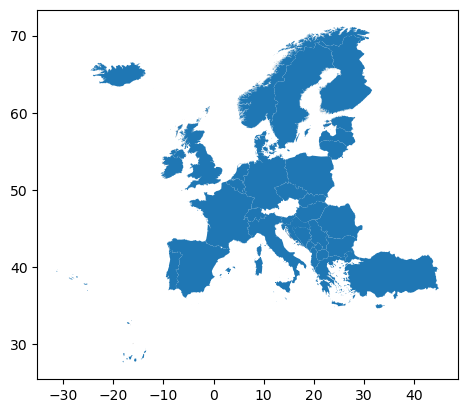

In [12]:
gdf.plot()

The plot above shows the drawings of the multi-polygons of the countries (default). If you want to draw only the outlines, the border lines of the countries, you can use the `.boundary` method with the `.plot()` method.

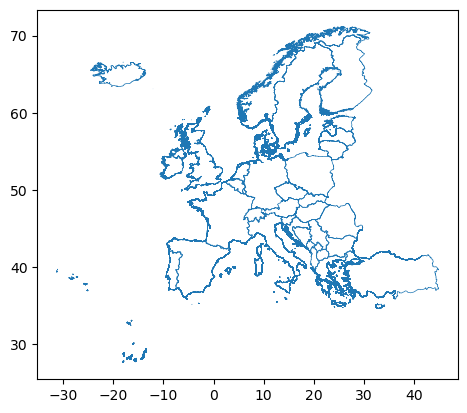

In [13]:
gdf.boundary.plot(linewidth=0.5)

plt.savefig('plot_shp_european_borders.png', bbox_inches='tight')

Draw each country using the columns 'GID_0' or 'COUNTRY'. To add a legend to the plot the parameter column has to be given to the plot call. GID_0 for the country abbreviation or COUNTRY for the standard name.

In [14]:
legend_kw = dict(loc='center left', bbox_to_anchor=(1,0.5), ncols=3, fontsize=6)

gdf.plot(column='COUNTRY', cmap='gist_rainbow', legend=True, legend_kwds=legend_kw, figsize=(12,5))  # standard names
#gdf.plot(column='GID_0', cmap='gist_rainbow', legend=True, legend_kwds=legend_kw, figsize=(12,5))    # abbreviations

<AxesSubplot: >

## Extract countries

We can extract a single country or a set of countries as shown above with the `loc` and `iloc` methods, but there is a third method called `where` that can do it as well.

Using `where` method

In [15]:
gdf.where(gdf['COUNTRY'] == 'Germany' ).plot()

<AxesSubplot: >

Here, we use the `loc` method of the GeoPandas DataFrame to extract the geometries of Germany, and assign it to a variable.

In [16]:
D = gdf.loc[gdf['COUNTRY'] == 'Germany']

print(D)

   GID_0  COUNTRY                                           geometry
10   DEU  Germany  MULTIPOLYGON (((7.98642 47.55553, 7.98445 47.5...


<br>

Extract multiple countries using `query()` method

The `query()` method allows us to pass a list of country names for the selection.

In [17]:
country_list = ['Germany', 'France']

countries = gdf.query('COUNTRY in @country_list')

print(countries)

   GID_0  COUNTRY                                           geometry
9    FRA   France  MULTIPOLYGON (((5.76875 43.07930, 5.76875 43.0...
10   DEU  Germany  MULTIPOLYGON (((7.98642 47.55553, 7.98445 47.5...


In [18]:
countries.plot()

<AxesSubplot: >

Print the index

In [19]:
cindex  = countries.index.values
print(cindex)

[ 9 10]


Print the multi-polygon geometries

In [20]:
print(countries.geometry)

9     MULTIPOLYGON (((5.76875 43.07930, 5.76875 43.0...
10    MULTIPOLYGON (((7.98642 47.55553, 7.98445 47.5...
Name: geometry, dtype: geometry


Get the bounds of the two countries, the minimum and maximum of the multipolygon coordinate data.

In [21]:
print(countries.bounds)

        minx       miny       maxx       maxy
9  -5.143751  41.333752   9.560416  51.089397
10  5.866251  47.270697  15.041815  55.056526


Print the polyline data of the multi-polygon.

In [22]:
print(countries.boundary)

9     MULTILINESTRING ((5.76875 43.07930, 5.76875 43...
10    MULTILINESTRING ((7.98642 47.55553, 7.98445 47...
dtype: geometry


<AxesSubplot: >

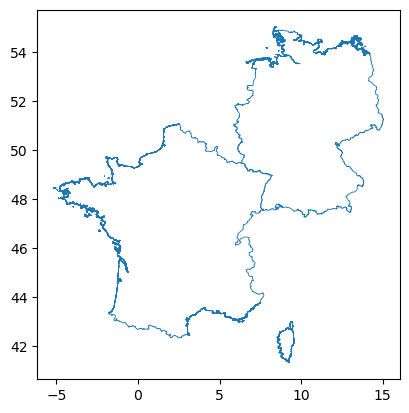

In [23]:
countries.boundary.plot(lw=0.6)

## Shapefile projection

In most cases the geometries of a shapefile based on a projection. We can get the stored projection with the `crs` property.

In [24]:
print(countries.crs)

EPSG:4326


## Plotting with Matplotlib

Sometimes you'll want to have more controll on the plot creation and that is why we here combine the plot functionalities of GeoPandas, Matplotlib, and Cartopy.

First, we select each geometry for the two countries Germany and France. We do this in order to have better control over the individual plots of the countries, e.g. the choice of colors, hatching or the respective labels for the legend.

In [25]:
D = gdf.loc[gdf['COUNTRY'] == 'Germany']
F = gdf.loc[gdf['COUNTRY'] == 'France']

In the next step, we 

- draw the two countries on a map, 
- zoom into the map, 
- add a legend to the right side of the plot

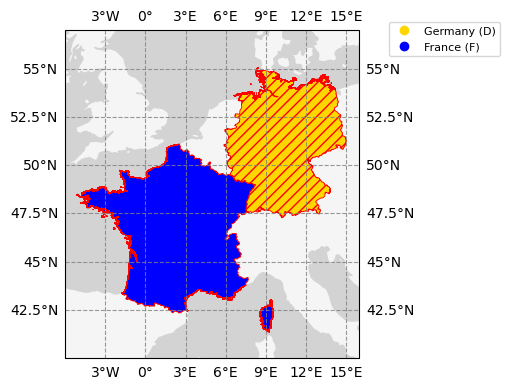

In [26]:
proj = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(6,4), layout='tight', subplot_kw={'projection': proj})

ax.set_extent([-6., 16., 40., 57.])
ax.gridlines(draw_labels=True, color='gray', alpha=0.8, linestyle='--')

style_kwds = dict(color='gold', edgecolor='red', hatch='///', linewidth=0.6,)

D.plot(ax=ax, **style_kwds, transform=ccrs.PlateCarree())

style_kwds = dict(color='blue', edgecolor='red', linewidth=0.6,)

F.plot(ax=ax, **style_kwds, transform=ccrs.PlateCarree())

legend_labels = ['Germany (D)', 'France (F)']

legend_item1 = Line2D([], [], linestyle='none', color='gold', marker='o', markerfacecolor="gold")
legend_item2 = Line2D([], [], linestyle='none', color='blue', marker='o', markerfacecolor="blue")
legend_marker = (legend_item1, legend_item2)

plt.legend(handles=legend_marker, labels=legend_labels, loc=(1.1, 0.92), fontsize=8)

ax.add_feature(cfeature.LAND.with_scale('50m'), color='whitesmoke', zorder=0)
ax.add_feature(cfeature.OCEAN.with_scale('50m'), color='lightgray', zorder=0);

## Re-project to Orthographic projection

To plot the pre-projected shapefile content correctly, we have to re-project it to the target projection, here Orthographic. Therefore, we can use the `to_crs()` method of the GeoPandas GeoDataFrame with the PROJ string from Cartopy's CRS of the target projection.

Target projection

In [27]:
proj = ccrs.Orthographic(central_longitude=0., central_latitude=52.)

Generate PROJ string from Cartopy CRS

In [28]:
proj_string = proj.proj4_init 

print(proj_string)

+a=6378137.0 +proj=ortho +lon_0=0.0 +lat_0=52.0 +no_defs


Re-project geometries of the GeoPandas GeoDataFrames D and F.

In [29]:
D_ortho = D.to_crs(proj_string)
F_ortho = F.to_crs(proj_string)

**Note:** <br>
Due to the fact that we re-project the shapefile geometries for the selected countries, we do not need to use the transform parameter in the plot call.

In the next step, we 

- draw the two countries on a map with Orthographic projection, 
- zoom into the map, 
- choose different colors and hatching,
- add a legend to the right side of the plot

run time: 0:00:01.650405



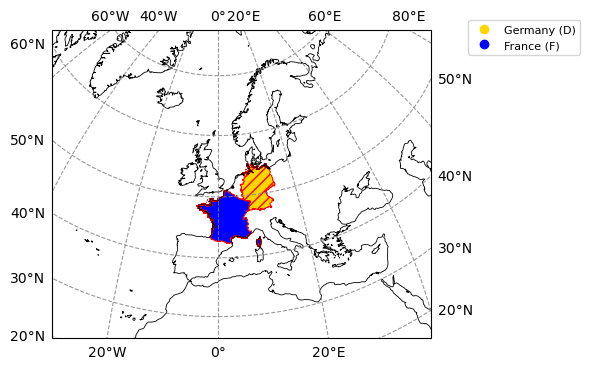

In [30]:
start_time = datetime.now() 

fig, ax = plt.subplots(figsize=(6,4), subplot_kw={'projection': proj})

ax.set_extent([-30., 40., 20., 75.])

ax.gridlines(draw_labels=True, color='gray', alpha=0.8, linestyle='--')
ax.coastlines(resolution='50m', linewidth=0.6, edgecolor='black')

style_kw = dict(color='gold', edgecolor='red', hatch='///', linewidth=0.6,)

D_ortho.plot(ax=ax, **style_kw)

style_kw = dict(color='blue', edgecolor='red', linewidth=0.6,)

F_ortho.plot(ax=ax, **style_kw)

legend_labels = ['Germany (D)', 'France (F)']
legend_item1 = Line2D([], [], linestyle='none', color='gold', marker='o', markerfacecolor='gold')
legend_item2 = Line2D([], [], linestyle='none', color='blue', marker='o', markerfacecolor='blue')
legend_marker = (legend_item1, legend_item2)

plt.legend(handles=legend_marker, labels=legend_labels, fontsize=8, loc=(1.1, 0.92))

print(f'run time: {datetime.now() - start_time}\n')

<br>

### Make it faster with Cartopy's `ax.add_geometries()`

A faster way to generate the plot of the map with the shapefile geometries is to use Cartopy's `ax.add_geometries()` method instead of geoDataFrame.plot().

run time: 0:00:00.017392



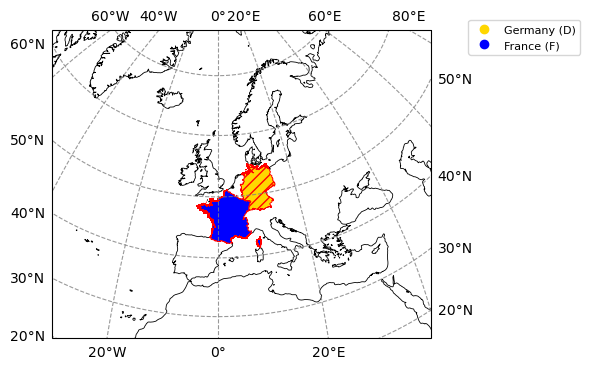

In [31]:
start_time = datetime.now() 

fig, ax = plt.subplots(figsize=(6,4), subplot_kw={'projection': proj})

ax.set_extent([-30., 40., 20., 75.])

ax.gridlines(draw_labels=True, color='gray', alpha=0.8, linestyle='--')
ax.coastlines(resolution='50m', linewidth=0.6, edgecolor='black')

style_kw = dict(facecolor='gold', edgecolor='red', hatch='///', linewidth=0.6,)

ax.add_geometries(D_ortho["geometry"], crs=proj, **style_kw)

style_kw = dict(facecolor='blue', edgecolor='red', linewidth=0.6,)

ax.add_geometries(F_ortho["geometry"], crs=proj, **style_kw,)

legend_labels = ['Germany (D)', 'France (F)']
legend_item1 = Line2D([], [], linestyle='none', color='gold', marker='o', markerfacecolor='gold')
legend_item2 = Line2D([], [], linestyle='none', color='blue', marker='o', markerfacecolor='blue')
legend_marker = (legend_item1, legend_item2)
plt.legend(handles=legend_marker, labels=legend_labels, loc=(1.1, 0.92), fontsize=8)

print(f'run time: {datetime.now() - start_time}\n')

## Overlay, draw borderlines over data

For the sake of simplicity, we use an example data set provided by the **Xarray** package. See also https://docs.xarray.dev/en/stable/generated/xarray.tutorial.open_dataset.html

The data set we use here contains the variable **rasm** which is the output of the Regional Arctic System Model (RASM). 

**Note:** <br>
The variable **Tair** has the coordinates (time,y,x) where x and y are the logical coordinates that point to the physical coordinate variables xc and yc. The physical coordinates xc,yc are 2-dimensional arrays.

In [32]:
import xarray as xr

ds = xr.tutorial.open_dataset('rasm')

print(ds)

<xarray.Dataset>
Dimensions:  (time: 36, y: 205, x: 275)
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 ...
    yc       (y, x) float64 ...
Dimensions without coordinates: y, x
Data variables:
    Tair     (time, y, x) float64 ...
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...
    history:                   Fri Aug  7 17:57:38 2020: ncatted -a bounds,,d...


Select the first time step

In [33]:
var = ds.Tair.isel(time=0)

<br>
Let's have a quick look at the data. Using the plot() method without further parameter settings, the plot routine will use the logical coordinates.

In [34]:
var.plot()

Now, we can use the already known plotting content from above and add the data variable using the physical coordinates.

You can use Xarray's or Matplotlib's plot methods. Under the hood, Xarray uses the plot functionality of Matplotlib.

In the following we only need the plot commands from above plus a plot command for the variable Tair. As there are two ways of plotting the data, we create two plots next to each other so that we can compare them more easily.

run time: 0:00:00.112809



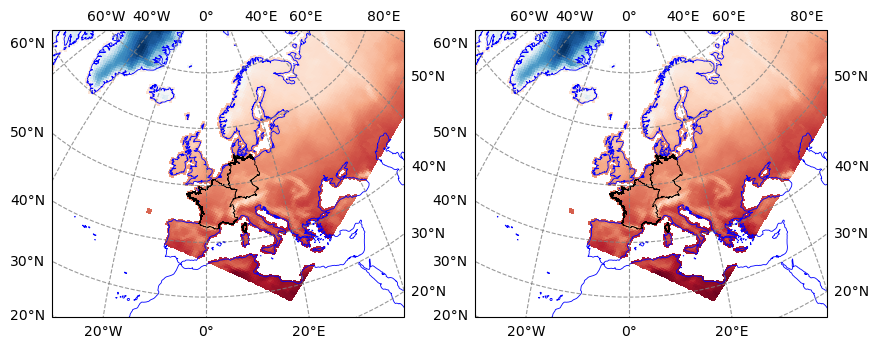

In [35]:
start_time = datetime.now() 

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,10), subplot_kw={'projection': proj})

#-- use Xarray's plot method (uses Matplotlib under the hood)
ax1.set_extent([-30., 40., 20., 75.])
ax1.gridlines(draw_labels=True, color='gray', alpha=0.8, linestyle='--')
ax1.coastlines(resolution='50m', linewidth=0.6, color='blue')

cn1 = var.plot.pcolormesh(ax=ax1, x='xc', y='yc', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree())
ax1.set_title('')

#-- use Matplotlib's plot method
ax2.set_extent([-30., 40., 20., 75.])
ax2.gridlines(draw_labels=True, color='gray', alpha=0.8, linestyle='--')
ax2.coastlines(resolution='50m', linewidth=0.6, color='blue')

cn2 = ax2.pcolormesh(ds.xc, ds.yc, var, cmap='RdBu_r', transform=ccrs.PlateCarree())

#-- add geometries to both plots
style_kw = dict(facecolor='None', edgecolor='black', linewidth=0.5)

ax1.add_geometries(D_ortho["geometry"], crs=proj, **style_kw)
ax1.add_geometries(F_ortho["geometry"], crs=proj, **style_kw,)

ax2.add_geometries(D_ortho["geometry"], crs=proj, **style_kw)
ax2.add_geometries(F_ortho["geometry"], crs=proj, **style_kw,)

print(f'run time: {datetime.now() - start_time}\n')

<br>

**Conclusion:** with GeoPandas, shapefiles can be used in a very simple way.